In [1]:
library(Rmpfr)
library(mia)
library(miaSim)
library(miaViz)

library(tibble)
library(ggplot2)
library(tidyr)
library(dplyr)

Loading required package: gmp


Attaching package: ‘gmp’


The following objects are masked from ‘package:base’:

    %*%, apply, crossprod, matrix, tcrossprod


C code of R package 'Rmpfr': GMP using 64 bits per limb



Attaching package: ‘Rmpfr’


The following object is masked from ‘package:gmp’:

    outer


The following objects are masked from ‘package:stats’:

    dbinom, dgamma, dnbinom, dnorm, dpois, dt, pnorm


The following objects are masked from ‘package:base’:

    cbind, pmax, pmin, rbind


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats

In [8]:
#A_normal <- ppng(filename="bench_query_sort.png", width=600, height=600)owerlawA(n_species = 9, alpha = 3)
A_normal <- matrix(c(
  -1.0000000,  0.00000000, 0,  0.00000000,  0.02895037,  0.00000000,  0.00000000,  0.00000000,  0.0000000,
   0.0000000, -1.00000000, 0,  0.00000000,  0.00000000,  0.00000000,  0.00000000,  0.00000000,  0.0000000,
   0.0000000,  0.00000000, -1, 0.00000000,  0.00000000,  0.00000000, -0.03785497,  0.00000000, -0.0516767,
   0.0000000,  0.00000000, 0, -1.00000000,  0.00000000,  0.00000000,  0.00000000,  0.00000000,  0.0000000,
   0.0000000,  0.00000000, 0, -0.06071935, -1.00000000, -0.04386775,  0.00000000,  0.04901188,  0.0000000,
   0.0000000,  0.03167187, 0,  0.00000000,  0.00000000, -1.00000000,  0.00000000,  0.00000000,  0.0000000,
   0.0350029,  0.00000000, 0,  0.00000000,  0.00000000,  0.00000000, -1.00000000,  0.00000000,  0.0000000,
   0.1000000,  0.00000000, 0,  0.00000000,  0.00000000,  0.00000000,  0.00000000, -1.00000000,  0.0000000,
   0.0000000,  0.00000000, 0, -0.03640917,  0.09988616,  0.00000000,  0.00000000,  0.00000000, -1.0000000
), nrow = 9, byrow = TRUE)
A_uniform <-  matrix(c(
  -0.40000000, -0.01152823,  0.015980400,  0.000000000,  0.000000000,  0.000000000,  0.00000000,  0.00000000, -0.018445738,
   0.00000000, -0.40000000,  0.000000000,  0.000000000,  0.000000000,  0.000000000,  0.00000000,  0.00000000, -0.004593987,
   0.00000000, -0.01567493, -0.400000000, -0.012615025,  0.000000000,  0.029615058,  0.00000000,  0.01008363,  0.000000000,
   0.00000000,  0.00000000, -0.001460799, -0.400000000,  0.007475885,  0.008318838,  0.00000000,  0.00000000,  0.000000000,
   0.00000000,  0.00000000,  0.000000000,  0.020087797, -0.400000000, -0.000892434,  0.00000000,  0.00000000,  0.018963453,
   0.00000000,  0.00000000, -0.022756335,  0.002165931, -0.002468731, -0.400000000,  0.00000000,  0.00000000,  0.000000000,
   0.01522552,  0.00000000,  0.000000000,  0.000000000,  0.000000000,  0.000000000, -0.40000000,  0.02068556,  0.000000000,
  -0.01529562,  0.00000000,  0.000000000,  0.000000000,  0.000000000,  0.024447900,  0.00000000, -0.40000000,  0.000000000,
   0.00000000, -0.01959111,  0.000000000,  0.023025146,  0.027586365,  0.000000000,  0.00000000,  0.02227313, -0.400000000
), nrow = 9, byrow = TRUE)

newA <- -matrix(c(10, 6, 12, 
                 14, 10, 2, 
                 8, 18, 10), 3, 3, byrow = TRUE)

In [9]:
x0_3 <- 0.1 * runif(3)

In [10]:
x0_3

[1] 0.08086255 0.06450860 0.09280090

In [11]:
#gr <- c(0.2, 0.25, 0.18, 0.22, 0.15, 0.2, 0.27, 0.3, 0.19)
gr <- c(1,1,1)

In [12]:
#ini <- c(0.5, 0.8, 0.3, 0.6, 0.4, 0.5, 0.9, 0.7, 0.2)
ini <- x0_3

In [36]:
tse_glv <- simulateGLV(n_species = 4,
                       A = A_4,
                       x0 = x0_4,
                       growth_rates=r_4,
                       t_start = 0, 
                       t_end=500,
                       stochastic = FALSE,
                       norm = FALSE)

A_normal <- powerlawA(n_species = 9, alpha = 3)

A_uniform <- randomA(n_species = 10,
                     diagonal = -0.4,
                     connectance = 0.5,
                     interactions = runif(n = 10^2, min = -0.8, max = 0.8))

tse_ricker <- simulateRicker(n_species=9, A = A_normal, t_end=100, norm = FALSE)

tse_hubbell <- simulateHubbell(n_species = 8,
                               M = 10,
                               carrying_capacity = 1000,
                               k_events = 50,
                               migration_p = 0.02,
                               t_end = 100)

tse_soi <- simulateSOI(n_species = 4, carrying_capacity = 1000,
                       A = A_normal, k_events=5,
                       x0 = NULL,t_end = 150, norm = TRUE)

tse_logistic <- simulateStochasticLogistic(n_species = 5)

tse_crm <- simulateConsumerResource(n_species = 2,
                                    n_resources = 4,
                                    E = randomE(n_species = 2, n_resources = 4))

tse_glv <- simulateGLV(n_species = 9,
                       A = A_normal,
                       t_start = 0, 
                       t_store = 1000,
                       stochastic = FALSE,
                       norm = FALSE)

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


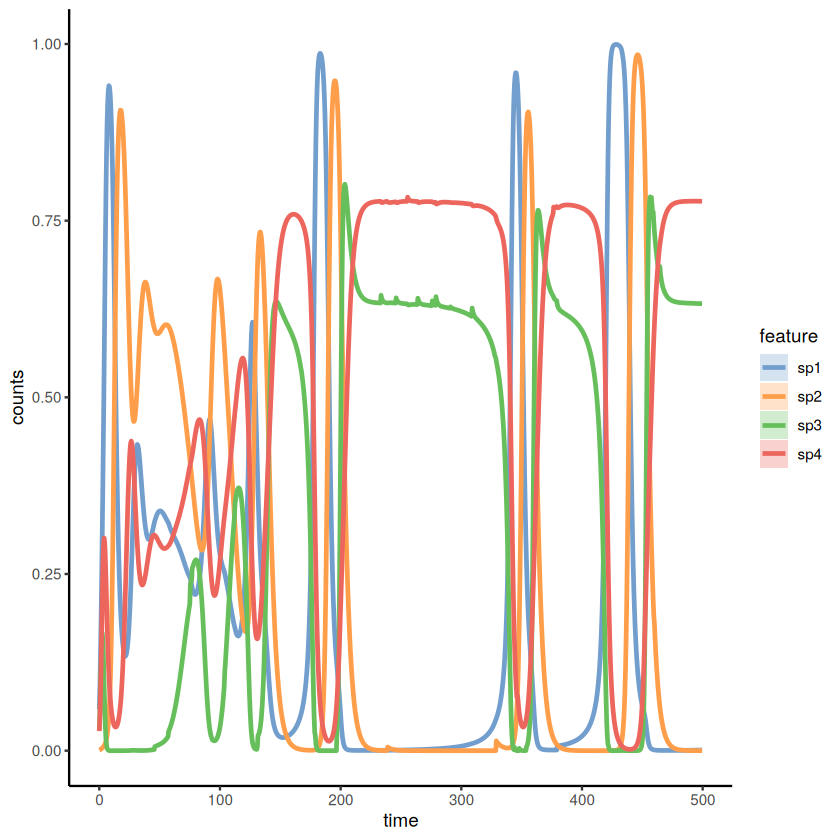

In [37]:
plotSeries(tse_glv, x = "time")

In [17]:
sim_df <- as.data.frame(assays(tse_glv)[[1]])

In [18]:
long_sim_df <- sim_df %>%
  rownames_to_column(var = "species") %>%
  pivot_longer(cols = starts_with("V"), names_to = "time", values_to = "value") %>%
  mutate(time = as.numeric(gsub("V", "", time)))

In [19]:
long_sim_df <- long_sim_df %>% mutate (time=time/2)

In [20]:
png(filename="bench_query_sort.png", width=800, height=600)

ggplot(long_sim_df, aes(x = time, y = value, color = species)) +
  geom_line(size = 1.2) +  # Increase line width for better visibility
  labs(
    title = "Time Series Plot for Species",
    subtitle = "Visualizing trends over time",  # Optional subtitle for more context
    x = "Time (in seconds)",  # Provide units if possible
    y = "Value (unit)",  # Provide units for clarity
    color = "Species"  # Clear label for the legend
  ) +
  theme_minimal(base_size = 14) +  # Increase base font size for readability
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Center the title, increase size
    plot.subtitle = element_text(hjust = 0.5),  # Center the subtitle
    axis.text = element_text(size = 12),  # Larger axis text for better readability
    axis.title = element_text(size = 14),  # Larger axis title for clarity
    legend.position = "right",  # Move legend to the right for cleaner layout
    legend.key = element_rect(fill = "white", colour = "black")  # Clean up the legend keys
  )

dev.off()

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


pdf 
  2

In [38]:
powerlawA(n_species = 9, alpha = 3)

,1,2,3,4,5,6,7,8,9
1,-1.00000000,0.00000000,0.0000000,0.00000000,0.0,0.00000000,0.00000000,0.01616151,0.00000000
2,-0.16053075,-1.00000000,0.0000000,0.00000000,0.0,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,-1.0000000,0.00000000,0.0,-0.09943619,0.00000000,0.00000000,0.00000000
4,0.00000000,0.01756099,0.0000000,-1.00000000,0.0,0.00000000,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,0.0000000,-0.01787418,-1.0,0.00000000,-0.01716156,0.00000000,0.00000000
6,0.00000000,0.00000000,-0.2683196,0.00000000,0.1,-1.00000000,0.00000000,0.00000000,0.03570615
7,0.00000000,0.05822163,0.0000000,0.00000000,0.0,0.00000000,-1.00000000,0.00000000,0.00000000
8,0.09766223,0.00000000,0.0000000,0.00000000,0.0,0.00000000,0.00000000,-1.00000000,0.00000000
9,0.00000000,0.00000000,0.0000000,0.00000000,0.0,0.00000000,0.00000000,0.00000000,-1.00000000


In [40]:
powerlawA(n_species = 9, alpha = 3)

,1,2,3,4,5,6,7,8,9
1,-1.00000000,-0.2480984,0.000000,0.00000000,0,0.06665555,0.000000000,0.00000000,0.01946731
2,0.00000000,-1.0000000,0.000000,0.00000000,0,0.00000000,0.000000000,0.00000000,0.00000000
3,0.00000000,0.0000000,-1.000000,0.00000000,0,0.00000000,0.000000000,0.05284632,0.00000000
4,0.00000000,0.0000000,0.000000,-1.00000000,0,0.00000000,0.004735767,0.00000000,0.00000000
5,0.00000000,0.0000000,0.000000,0.02368241,-1,0.00000000,0.000000000,0.00000000,0.00000000
6,-0.06303571,0.0000000,0.000000,0.00000000,0,-1.00000000,0.000000000,0.00000000,0.00000000
7,0.00000000,0.0000000,0.000000,0.00000000,0,0.00000000,-1.000000000,0.00000000,0.00000000
8,0.00000000,-0.1434217,-0.211987,0.00000000,0,0.00000000,0.000000000,-1.00000000,0.00000000
9,0.00000000,0.0000000,0.000000,0.00000000,0,0.00000000,0.000000000,0.00000000,-1.00000000


In [46]:
randomA(n_species = 9, diagonal = -0.4, connectance = 0.5, interactions = runif(n = 9^2, min = -0.8, max = 0.8))

,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9
sp1,-0.40000000,-0.01152823,0.015980400,0.000000000,0.000000000,0.0000000000,0.0,0.00000000,-0.018445738
sp2,0.00000000,-0.40000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0,0.00000000,-0.004593987
sp3,0.00000000,-0.01567493,-0.400000000,-0.012615025,0.000000000,0.0296150587,0.0,0.01008363,0.000000000
sp4,0.00000000,0.00000000,-0.001460799,-0.400000000,0.007475885,0.0083188377,0.0,0.00000000,0.000000000
sp5,0.00000000,0.00000000,0.000000000,0.020087797,-0.400000000,-0.0008924343,0.0,0.00000000,0.018963453
sp6,0.00000000,0.00000000,-0.022756335,0.002165931,-0.002468731,-0.4000000000,0.0,0.00000000,0.000000000
sp7,0.01522552,0.00000000,0.000000000,0.000000000,0.000000000,0.0000000000,-0.4,0.02068556,0.000000000
sp8,-0.01529562,0.00000000,0.000000000,0.000000000,0.000000000,0.0244479000,0.0,-0.40000000,0.000000000
sp9,0.00000000,-0.01959111,0.000000000,0.023025146,0.027586365,0.0000000000,0.0,0.02227313,-0.400000000


In [24]:
library(deSolve) # integrate ODEs
library(tidyverse) # plotting and wrangling

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()      masks XVector::compact()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::full_join()    masks mia::full_join()
✖ dplyr::inner_join()   masks mia::inner_join()
✖ dplyr::lag()          masks stats::lag()
✖ dplyr::left_join()    masks mia::left_join()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base:

In [25]:
# Generalized Lotka-Volterra model
GLV <- function(t, x, parameters){
  with(as.list(c(x, parameters)), {
    x[x < 10^-8] <- 0 # prevent numerical problems
    dxdt <- x * (r + A %*% x)
    list(dxdt)
  })
}
# function to plot output
plot_ODE_output <- function(out){
  out <- as.data.frame(out)
  colnames(out) <- c("time", paste("sp", 1:(ncol(out) -1), sep = "_"))
  out <- as_tibble(out) %>% gather(species, density, -time)
  pl <- ggplot(data = out) + 
    aes(x = time, y = density, colour = species) + 
    geom_line()
  show(pl)
  return(out)
}
# general function to integrate GLV
integrate_GLV <- function(r, A, x0, maxtime = 100, steptime = 0.5){
  times <- seq(0, maxtime, by = steptime)
  parameters <- list(r = r, A = A)
  # solve numerically
  out <- ode(y = x0, times = times, 
           func = GLV, parms = parameters, 
           method = "ode45")
  # plot and make into tidy form
  out <- plot_ODE_output(out)
  return(out)
}

[1] -0.08333333  0.25000000 -0.08333333


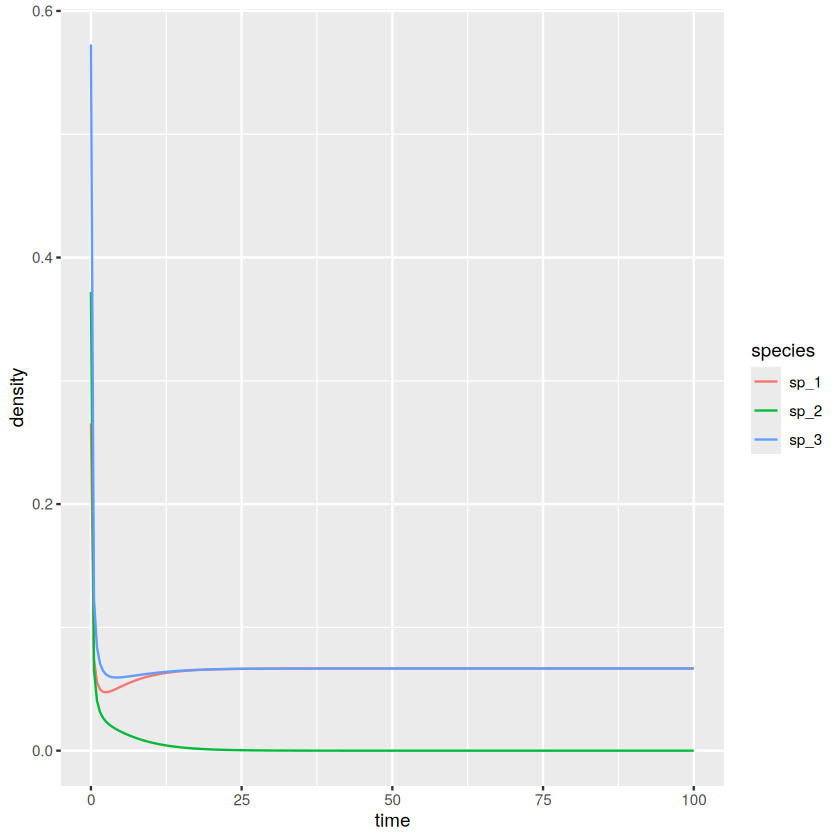

In [26]:
set.seed(1) # for reproducibility
r_1 <- rep(1, 3)
A_1 <- -matrix(c(10, 9, 5, 
                 9, 10, 9, 
                 5, 9, 10), 3, 3, byrow = TRUE)
# check the existence of feasible equilibrium
print(solve(A_1, -r_1)) # not feasible
x0_1 <- runif(3)
res_1 <- integrate_GLV(r_1, A_1, x0_1)

[1] 0.1661130 0.3654485 0.4817276


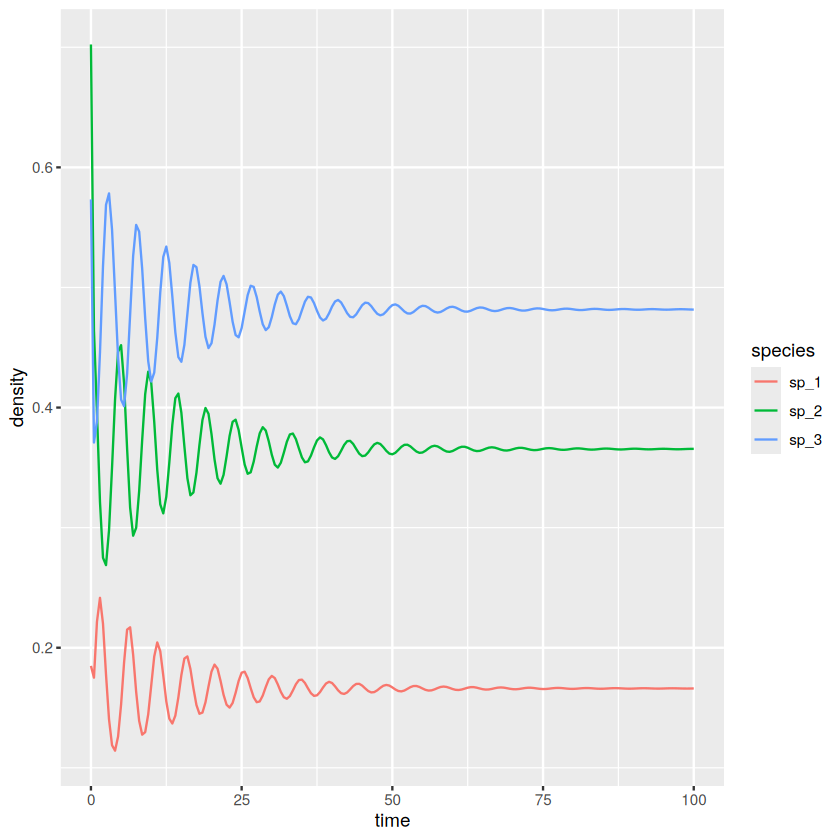

In [27]:
set.seed(2) # for reproducibility
r_2 <- rep(10, 3)
A_2 <- -matrix(c(10, 7, 12, 
                 15, 10, 8, 
                 7, 11, 10), 3, 3, byrow = TRUE)
# check the existence of feasible equilibrium
print(solve(A_2, -r_2)) # feasible
x0_2 <- runif(3)
res_2 <- integrate_GLV(r_2, A_2, x0_2)

[1] 0.05714286 0.01428571 0.02857143


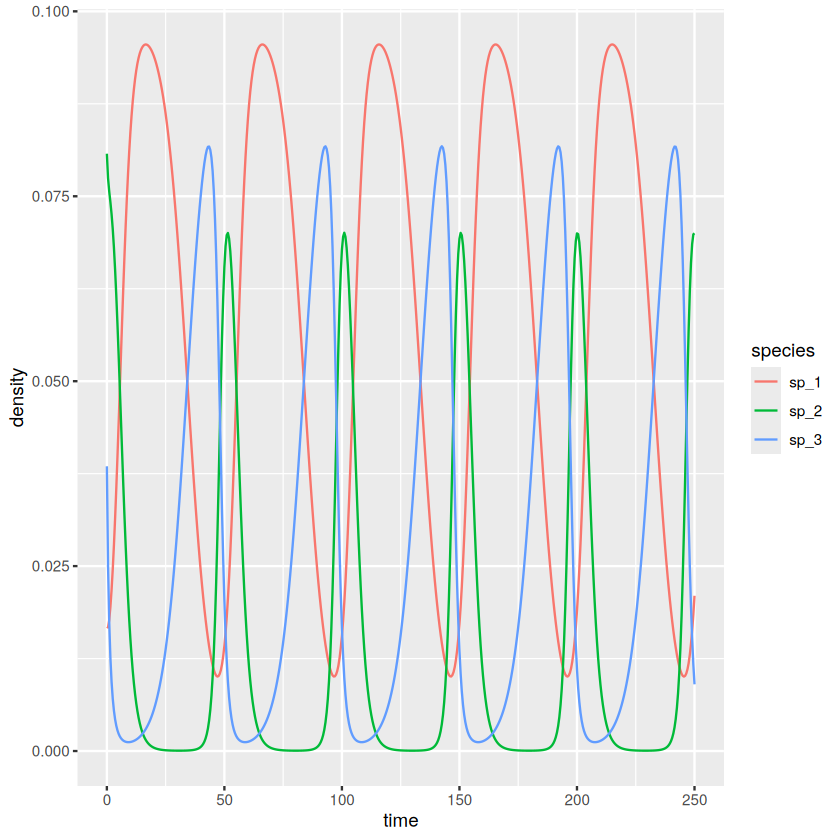

In [30]:
set.seed(3) # for reproducibility
r_3 <- rep(1, 3)
A_3 <- -matrix(c(10, 6, 12, 
                 14, 10, 2, 
                 8, 18, 10), 3, 3, byrow = TRUE)
# check the existence of feasible equilibrium
print(solve(A_3, -r_3)) # feasible
x0_3 <- 0.1 * runif(3)
res_3 <- integrate_GLV(r_3, A_3, x0_3, maxtime = 250)

In [31]:
x0_3

[1] 0.01680415 0.08075164 0.03849424

[1] 0.3013030 0.4586546 0.1307655 0.3557416


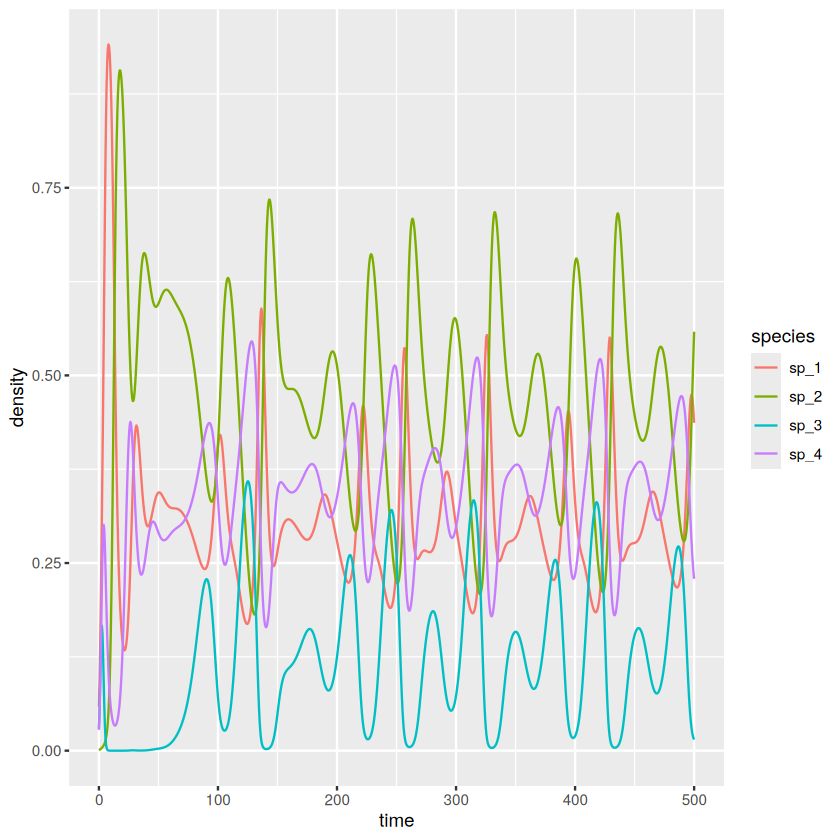

In [32]:
set.seed(4) # for reproducibility
r_4 <- c(1, 0.72, 1.53, 1.27)
A_4 <- -matrix(c(1, 1.09, 1.52, 0, 
                 0, 0.72, 0.3168, 0.9792, 
                 3.5649, 0, 1.53, 0.7191,
                 1.5367, 0.6477, 0.4445, 1.27), 4, 4, byrow = TRUE)
# check the existence of feasible equilibrium
print(solve(A_4, -r_4)) # feasible
x0_4 <- 0.1 * runif(4)
res_4 <- integrate_GLV(r_4, A_4, x0_4, maxtime = 500)

In [33]:
x0_4

[1] 0.0585800305 0.0008945796 0.0293739612 0.0277374958